# 1. 資料介紹

In [13]:
#看看資料集內容
import pandas as pd
df = pd.read_csv("exercise_dataset.csv")
print(df.head())
print(df.info())


          x         t
0  3.869780  1.203658
1  2.194392  0.601150
2  4.292990  0.170647
3  3.486840 -0.045119
4  0.470887  0.293785
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       200 non-null    float64
 1   t       200 non-null    float64
dtypes: float64(2)
memory usage: 3.3 KB
None


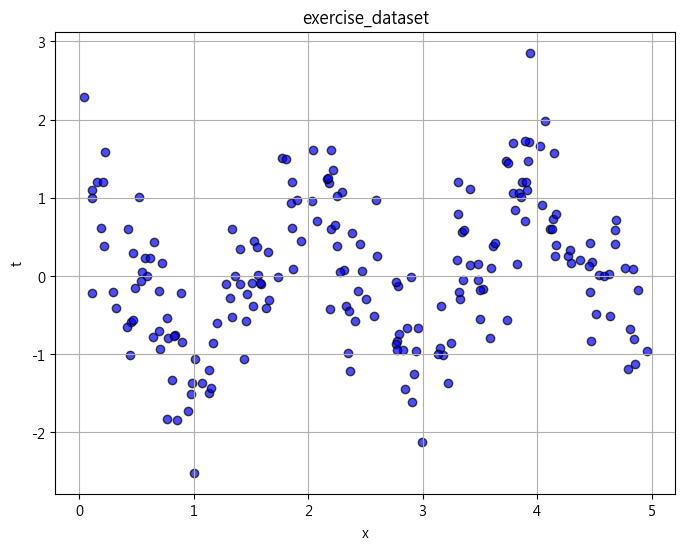

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

# 設定中文字型（Windows 系統建議使用 Microsoft JhengHei）
plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei']   # 顯示中文
plt.rcParams['axes.unicode_minus'] = False                 # 正常顯示負號

# 讀取資料
df = pd.read_csv("exercise_dataset.csv")

# 畫原始資料散佈圖
plt.figure(figsize=(8, 6))
plt.scatter(df['x'], df['t'], color='blue', alpha=0.7, edgecolors='k')

plt.title("exercise_dataset")
plt.xlabel("x")
plt.ylabel("t")
plt.grid(True)
plt.show()


# 2. 實驗方法

In [15]:
# 3.1 資料前處理（Data Preprocessing）

import pandas as pd
df = pd.read_csv("exercise_dataset.csv")
print(df.head())
print(df.info())


          x         t
0  3.869780  1.203658
1  2.194392  0.601150
2  4.292990  0.170647
3  3.486840 -0.045119
4  0.470887  0.293785
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       200 non-null    float64
 1   t       200 non-null    float64
dtypes: float64(2)
memory usage: 3.3 KB
None


In [16]:
# 3.2 訓練與測試資料切分（Train-Test Split）
from sklearn.model_selection import train_test_split

X = df[['x']]
y = df['t']
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=42)


In [17]:
# 3.3 交叉驗證（Cross Validation）

from sklearn.model_selection import cross_val_score
import numpy as np

scores = cross_val_score(model, X, y, cv=5, scoring='r2')
print("平均 R² 分數 =", np.mean(scores))


平均 R² 分數 = 0.26110188769702025


In [18]:
# 3.4 評估指標（Evaluation Metrics）

from sklearn.metrics import mean_squared_error, r2_score

y_pred = model.predict(X_test)
print("MSE =", mean_squared_error(y_test, y_pred))
print("R² =", r2_score(y_test, y_pred))


MSE = 0.2879044777566409
R² = 0.6954506757297401


# 3. 實作

In [19]:
# ==============================
# 🧩 四種主要迴歸模型比較
# 模型: Linear / Ridge / Lasso / Polynomial(degree=5)
# ==============================

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, r2_score

# 1️⃣ 讀取資料
df = pd.read_csv("exercise_dataset.csv")
X = df[['x']]
y = df['t']

# 2️⃣ 分割訓練 / 測試資料
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3️⃣ 建立四種模型（這就是你要有的 "models"）
models = {
    "Linear Regression": LinearRegression(),                 # 線性迴歸
    "Ridge Regression": Ridge(alpha=1.0),                    # 岭迴歸 (L2)
    "Lasso Regression": Lasso(alpha=0.1),                    # 套索迴歸 (L1)
    "Polynomial Regression (deg=5)": make_pipeline(          # 五次多項式迴歸
        PolynomialFeatures(degree=5),
        LinearRegression()
    )
}

# 4️⃣ 計算每個模型的 MSE、R²、CV R²
results = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    cv_r2 = cross_val_score(model, X, y, cv=5, scoring='r2').mean()
    results.append([name, mse, r2, cv_r2])

results_df = pd.DataFrame(results, columns=["Model", "Test MSE", "Test R²", "CV R²"])
print("\n📊 四種主要模型比較結果：")
print(results_df)



📊 四種主要模型比較結果：
                           Model  Test MSE   Test R²     CV R²
0              Linear Regression  1.068679 -0.130463  0.012431
1               Ridge Regression  1.068541 -0.130318  0.012479
2               Lasso Regression  1.055391 -0.116407  0.009252
3  Polynomial Regression (deg=5)  0.616856  0.347481  0.277461


c:\Users\Ryan\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\Ryan\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  warnings.warn(
c:\Users\Ryan\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(
c:\Users\Ryan\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


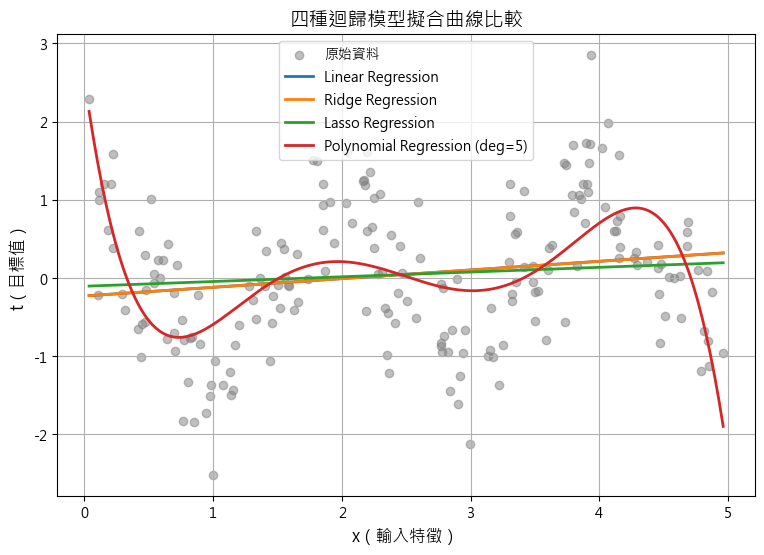

In [20]:
# ==============================
# 四種主要迴歸模型的擬合曲線比較圖
# 模型: Linear / Ridge / Lasso / Polynomial(degree=5)
# ==============================

import numpy as np
import matplotlib.pyplot as plt

# 設定中文字型（避免亂碼）
plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei']
plt.rcParams['axes.unicode_minus'] = False

# 建立等距的 x 值，用來畫平滑曲線
x_plot = np.linspace(X.min(), X.max(), 300).reshape(-1, 1)

# 建立圖表
plt.figure(figsize=(9, 6))

# 畫出原始資料散點圖
plt.scatter(X, y, color='gray', alpha=0.5, label="原始資料")

# 逐一畫出每個模型的預測曲線
for name, model in models.items():
    model.fit(X, y)  # 用整體資料重新訓練，畫出完整曲線
    y_pred_plot = model.predict(x_plot)
    plt.plot(x_plot, y_pred_plot, linewidth=2, label=name)

# 設定圖表樣式
plt.title("四種迴歸模型擬合曲線比較", fontsize=14)
plt.xlabel("x（輸入特徵）", fontsize=12)
plt.ylabel("t（目標值）", fontsize=12)
plt.legend()
plt.grid(True)
plt.show()



 多項式模型不同階數比較結果：
   Degree  Test MSE   Test R²     CV R²
0       3  0.910201  0.037177  0.072177
1       5  0.616856  0.347481  0.277461
2       7  0.415295  0.560695  0.461084
3       9  0.353008  0.626583  0.528400
4      13  0.425718  0.549670  0.479203
5      19  1.416024 -0.497890  0.261102


c:\Users\Ryan\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
c:\Users\Ryan\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
c:\Users\Ryan\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
c:\Users\Ryan\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
c:\Users\Ryan\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
c:\Users\Ryan\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does no

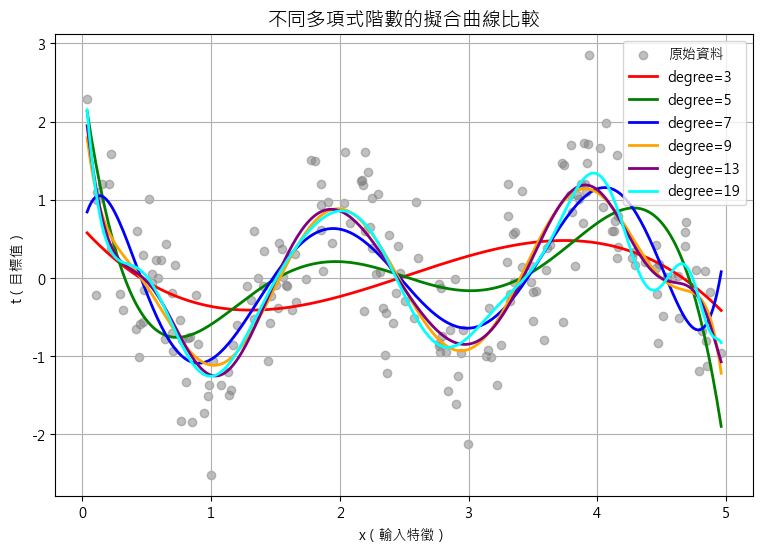

In [21]:
# ==============================
# Polynomial Regression 多階數比較
# degree = 3, 5, 7, 9, 13, 19
# ==============================

import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score

# 中文設定
plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei']
plt.rcParams['axes.unicode_minus'] = False

degrees = [3, 5, 7, 9, 13, 19]
results_poly = []

# 依序測試不同階數的多項式模型
for d in degrees:
    model = make_pipeline(PolynomialFeatures(d), LinearRegression())
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    cv_r2 = cross_val_score(model, X, y, cv=5, scoring='r2').mean()
    results_poly.append([d, mse, r2, cv_r2])

# 顯示表格
poly_df = pd.DataFrame(results_poly, columns=["Degree", "Test MSE", "Test R²", "CV R²"])
print("\n 多項式模型不同階數比較結果：")
print(poly_df)

# ==============================
# 畫出各階數擬合曲線
# ==============================
x_plot = np.linspace(X.min(), X.max(), 300).reshape(-1, 1)
plt.figure(figsize=(9, 6))
plt.scatter(X, y, color='gray', alpha=0.5, label="原始資料")

colors = ['r', 'g', 'b', 'orange', 'purple', 'cyan']

for d, c in zip(degrees, colors):
    model = make_pipeline(PolynomialFeatures(d), LinearRegression())
    model.fit(X, y)
    plt.plot(x_plot, model.predict(x_plot), color=c, linewidth=2, label=f"degree={d}")

plt.title("不同多項式階數的擬合曲線比較", fontsize=14)
plt.xlabel("x（輸入特徵）")
plt.ylabel("t（目標值）")
plt.legend()
plt.grid(True)
plt.show()
